<a href="https://colab.research.google.com/github/vfeistauer/Glioblastoma-Genetic-Mutation-Analysis/blob/main/Glioblastoma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/TCGA_InfoWithGrade.csv')

In [ ]:
df.head()

,Grade,Gender,Age_at_diagnosis,Race,IDH1,TP53,ATRX,PTEN,EGFR,CIC,...,FUBP1,RB1,NOTCH1,BCOR,CSMD3,SMARCA4,GRIN2A,IDH2,FAT4,PDGFRA
0,0,0,51.30,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,38.72,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,35.17,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,32.78,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,31.51,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Grade             839 non-null    int64  
 1   Gender            839 non-null    int64  
 2   Age_at_diagnosis  839 non-null    float64
 3   Race              839 non-null    int64  
 4   IDH1              839 non-null    int64  
 5   TP53              839 non-null    int64  
 6   ATRX              839 non-null    int64  
 7   PTEN              839 non-null    int64  
 8   EGFR              839 non-null    int64  
 9   CIC               839 non-null    int64  
 10  MUC16             839 non-null    int64  
 11  PIK3CA            839 non-null    int64  
 12  NF1               839 non-null    int64  
 13  PIK3R1            839 non-null    int64  
 14  FUBP1             839 non-null    int64  
 15  RB1               839 non-null    int64  
 16  NOTCH1            839 non-null    int64  
 1

<Axes: xlabel='Grade', ylabel='count'>

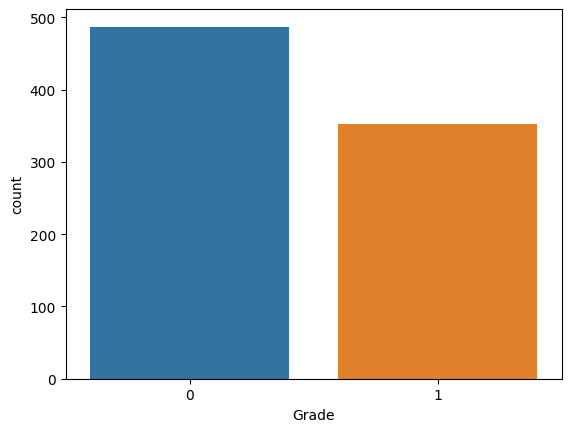

In [ ]:
sns.countplot(df, x= 'Grade')

In [ ]:
df['Grade'].value_counts()

0    487
1    352
Name: Grade, dtype: int64

Dados desbalanceados ??? No desbalanceamento leve, a classe de minoria representa de 20-40%, nesses dados a classe de minoria representa 42%.

[Link Google](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data?hl=pt-br)

<Axes: >

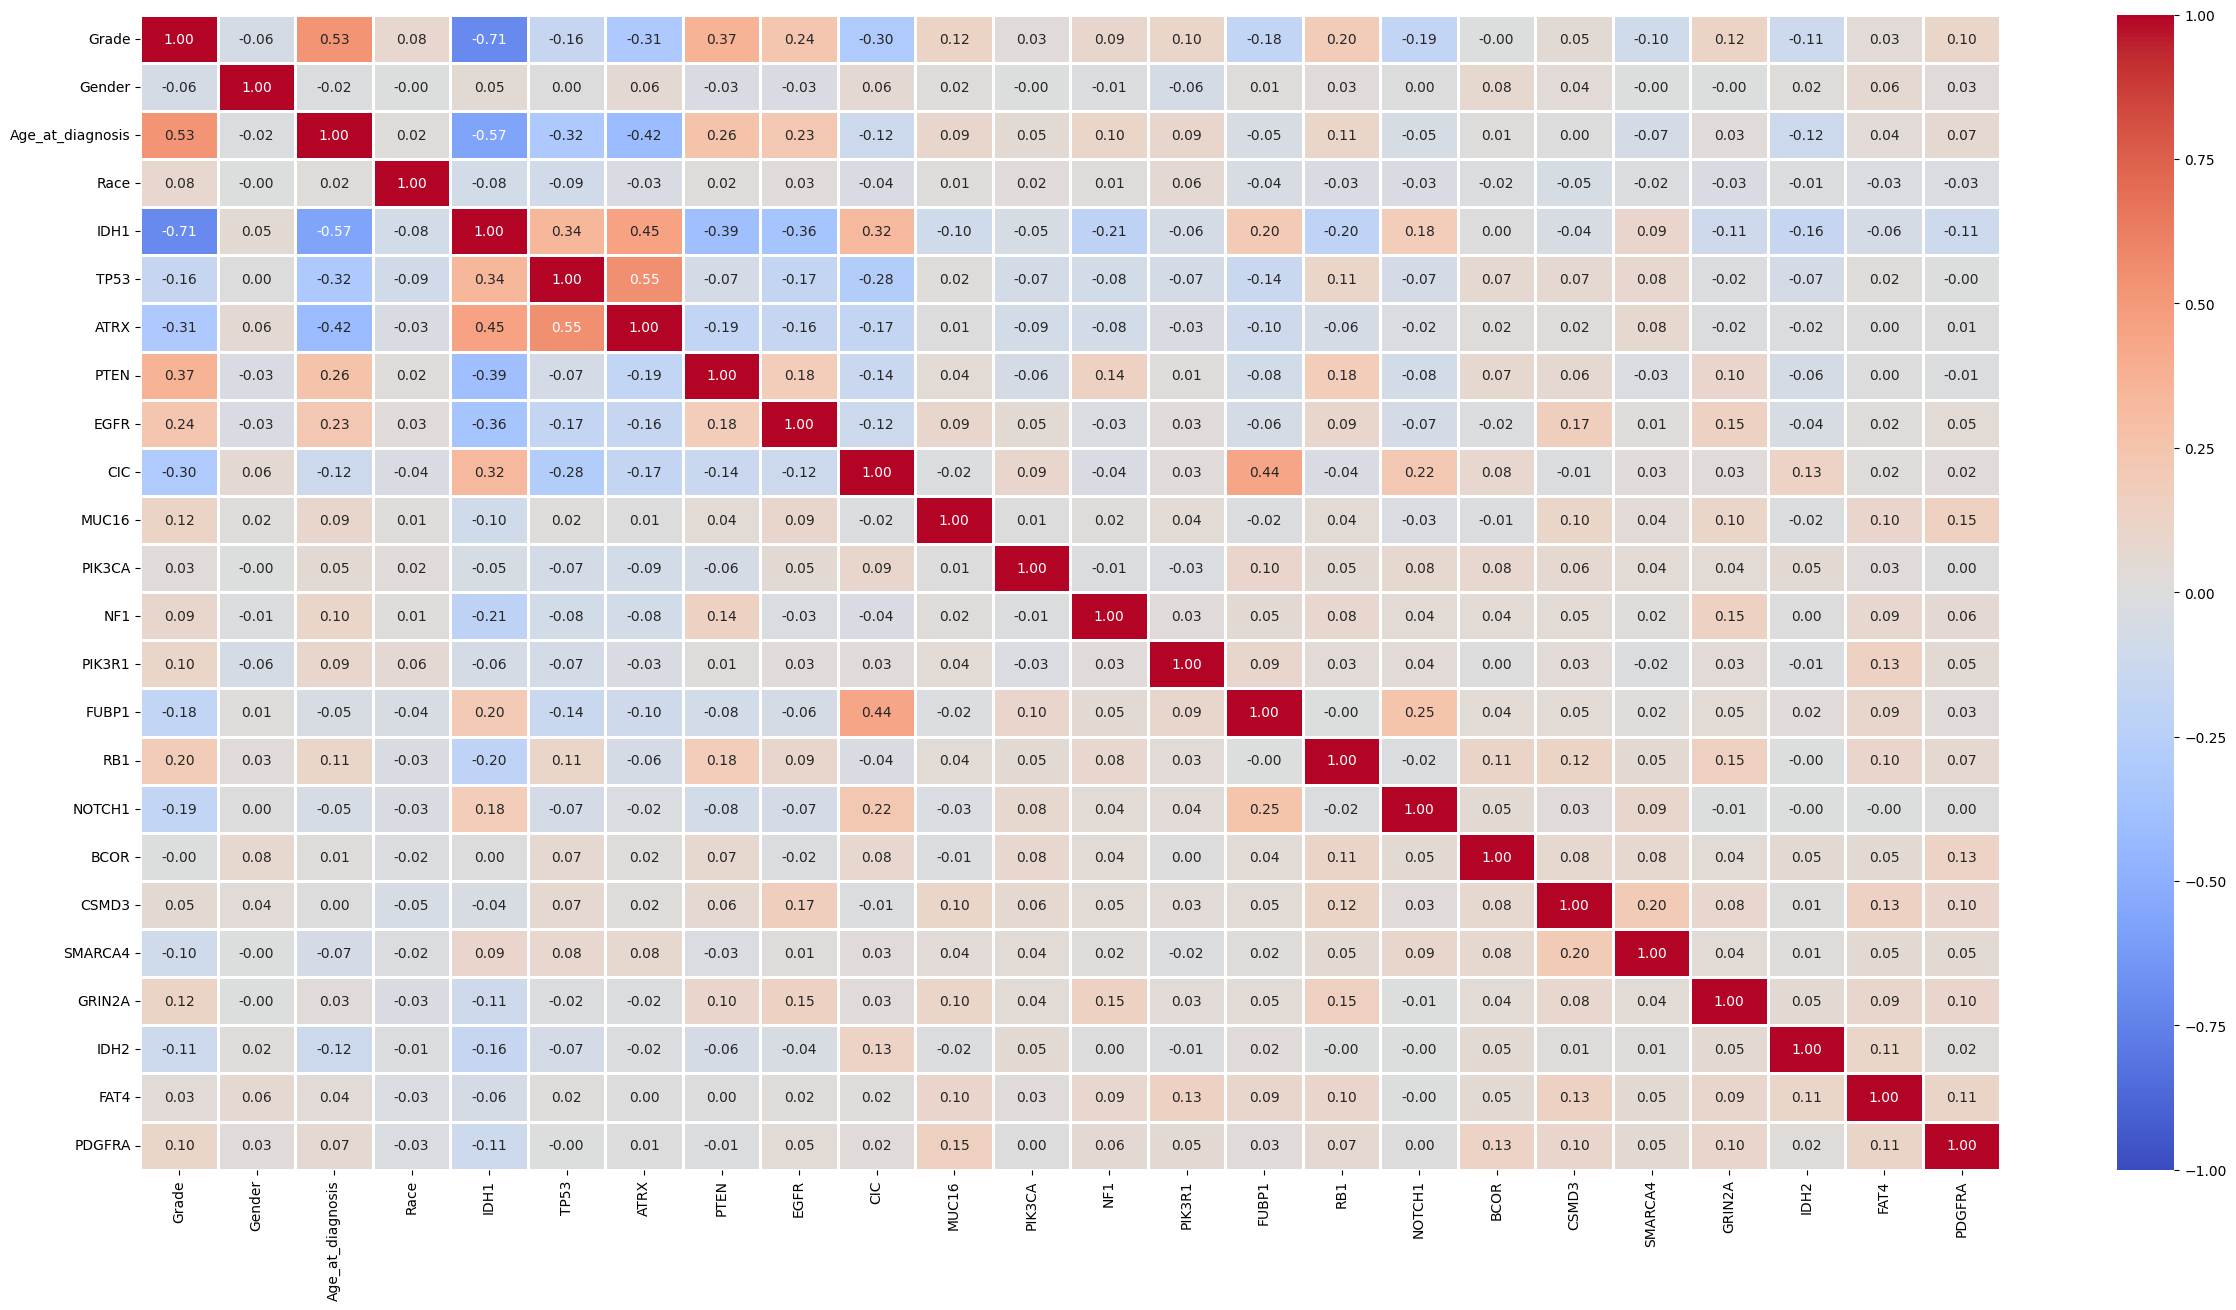

In [ ]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, linewidth=1, vmin=-1, vmax=1, center=0, fmt=".2f")

<Axes: xlabel='Age_at_diagnosis', ylabel='Count'>

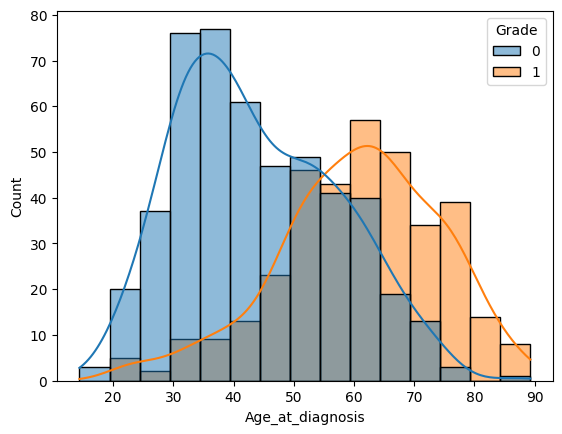

In [ ]:
sns.histplot(df, x= 'Age_at_diagnosis', kde=True, hue = 'Grade')

Podemos observar que o LGG (Lower-Grade Glioma) tem, em média, uma idade de diagnóstico mais baixa, e GBM (Glioblastoma Multiforme) tem, em média, idade diagnóstica maior.

In [ ]:
mean_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].mean()
std_age_by_grade = df.groupby('Grade')['Age_at_diagnosis'].std()

print("Mean age at diagnosis by grade:")
for grade, mean_age in mean_age_by_grade.items():
    std_age = std_age_by_grade[grade]
    print(f"Grade {grade}: {mean_age:.2f} +- {std_age:.2f}")

Mean age at diagnosis by grade:
Grade 0: 43.87 +- 13.26
Grade 1: 60.70 +- 13.43


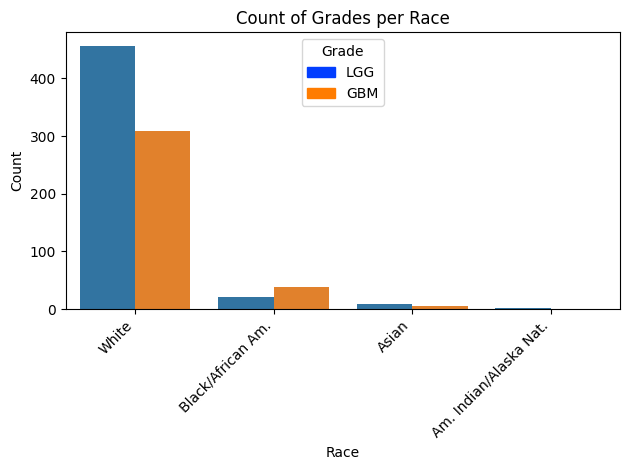

In [ ]:
import matplotlib.patches as mpatches

race_labels = {
    0: 'White',
    1: 'Black/African Am.',
    2: 'Asian',
    3: 'Am. Indian/Alaska Nat.'
}

# Group the data by Race and Grade and calculate the count
grouped_data = df.groupby(['Race', 'Grade']).size().reset_index(name='Count')

# Create a bar plot with color palette
sns.barplot(data=grouped_data, x='Race', y='Count', hue='Grade')

# Set the x-axis labels using the race_labels dictionary and rotate them
plt.xticks(ticks=range(len(race_labels)), labels=race_labels.values(), rotation=45, ha='right')

# Set the axis labels
plt.xlabel('Race')
plt.ylabel('Count')

# Set the plot title
plt.title('Count of Grades per Race')

# Create custom legend handles and labels
legend_labels = ['LGG', 'GBM']
colors = sns.color_palette('bright')[:len(legend_labels)]
legend_handles = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Add the custom legend
plt.legend(handles=legend_handles, title='Grade')

# Display the plot
plt.tight_layout()
plt.show()

Poucos dados em raças não-brancas.

In [ ]:
df.isnull().sum()

Grade               0
Gender              0
Age_at_diagnosis    0
Race                0
IDH1                0
TP53                0
ATRX                0
PTEN                0
EGFR                0
CIC                 0
MUC16               0
PIK3CA              0
NF1                 0
PIK3R1              0
FUBP1               0
RB1                 0
NOTCH1              0
BCOR                0
CSMD3               0
SMARCA4             0
GRIN2A              0
IDH2                0
FAT4                0
PDGFRA              0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['Grade'], axis=1)
y = df['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

**SUPPORT VECTOR CLASSIFIER**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model = SVC()

In [ ]:
model.fit(X_train,y_train)

SVC()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(y_test,predictions))

[[126  33]
 [ 31  62]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.79      0.80       159
           1       0.65      0.67      0.66        93

    accuracy                           0.75       252
   macro avg       0.73      0.73      0.73       252
weighted avg       0.75      0.75      0.75       252



## Gridsearch
Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested.

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [ ]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.559 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.564 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.746 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.761 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.718 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.720 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
grid.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
grid.best_estimator_

SVC(C=1000, gamma=0.001)

In [ ]:
grid_predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,grid_predictions))

[[125  34]
 [  5  88]]


In [ ]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       159
           1       0.72      0.95      0.82        93

    accuracy                           0.85       252
   macro avg       0.84      0.87      0.84       252
weighted avg       0.87      0.85      0.85       252



## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
predictions = dtree.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       159
           1       0.66      0.83      0.74        93

    accuracy                           0.78       252
   macro avg       0.77      0.79      0.78       252
weighted avg       0.80      0.78      0.79       252



In [ ]:
print(confusion_matrix(y_test,predictions))

[[120  39]
 [ 16  77]]


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[127  32]
 [ 11  82]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86       159
           1       0.72      0.88      0.79        93

    accuracy                           0.83       252
   macro avg       0.82      0.84      0.82       252
weighted avg       0.85      0.83      0.83       252



In [ ]:
parameters = {
  "n_estimators":[5,10,50,100,250],
  "max_depth":[2,4,8,16,32,None]

}

In [ ]:
from sklearn.model_selection import GridSearchCV

cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 10, 50, 100, 250]})

In [ ]:
def display(results):
  print(f'Best parameters are: {results.best_params_}')
  print("\n")
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  for mean,std,params in zip(mean_score,std_score,params):
      print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [ ]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 50}


0.836 + or -0.061 for the {'max_depth': 2, 'n_estimators': 5}
0.86 + or -0.028 for the {'max_depth': 2, 'n_estimators': 10}
0.877 + or -0.014 for the {'max_depth': 2, 'n_estimators': 50}
0.881 + or -0.013 for the {'max_depth': 2, 'n_estimators': 100}
0.876 + or -0.014 for the {'max_depth': 2, 'n_estimators': 250}
0.864 + or -0.019 for the {'max_depth': 4, 'n_estimators': 5}
0.872 + or -0.015 for the {'max_depth': 4, 'n_estimators': 10}
0.876 + or -0.017 for the {'max_depth': 4, 'n_estimators': 50}
0.879 + or -0.017 for the {'max_depth': 4, 'n_estimators': 100}
0.884 + or -0.013 for the {'max_depth': 4, 'n_estimators': 250}
0.869 + or -0.018 for the {'max_depth': 8, 'n_estimators': 5}
0.867 + or -0.02 for the {'max_depth': 8, 'n_estimators': 10}
0.886 + or -0.015 for the {'max_depth': 8, 'n_estimators': 50}
0.883 + or -0.019 for the {'max_depth': 8, 'n_estimators': 100}
0.881 + or -0.014 for the {'max_depth': 8, 'n_estimators':

In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, n_estimators=50)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[125  34]
 [  7  86]]


In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86       159
           1       0.72      0.92      0.81        93

    accuracy                           0.84       252
   macro avg       0.83      0.86      0.83       252
weighted avg       0.86      0.84      0.84       252



In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50)

cv = GridSearchCV(rfc,{'max_features': ["sqrt", "log2", 1, 2, 3, 4, 5, 6]},cv=5)
cv.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=8, n_estimators=50),
             param_grid={'max_features': ['sqrt', 'log2', 1, 2, 3, 4, 5, 6]})

In [ ]:
results = pd.DataFrame({"max_features": [param["max_features"] for param in cv.cv_results_['params']],
           "mean_score": list(cv.cv_results_['mean_test_score']),
           "std_score": cv.cv_results_['std_test_score']})
results

,max_features,mean_score,std_score
0,sqrt,0.882500,0.016150
1,log2,0.882500,0.020197
2,1,0.872258,0.016870
3,2,0.880776,0.014032
4,3,0.875677,0.017276
5,4,0.880805,0.018306
6,5,0.880791,0.013900
7,6,0.880820,0.023753


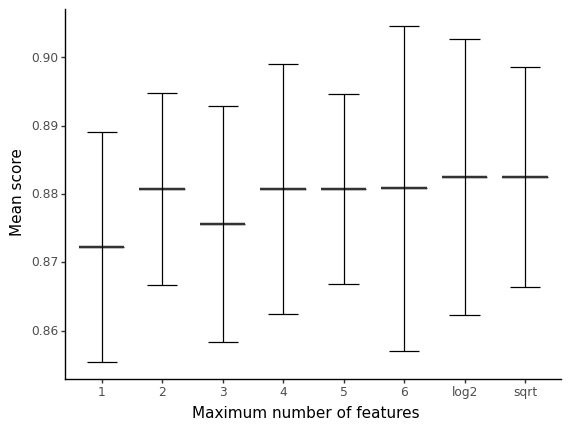

<ggplot: (8650412069684)>

In [ ]:
from plotnine import *

(
   ggplot(results) + geom_boxplot(aes(x='factor(max_features)', y='mean_score')) +
  geom_errorbar(aes(x='factor(max_features)', ymin='mean_score - std_score', ymax='mean_score + std_score')) +
  theme_classic() + xlab('Maximum number of features') + ylab('Mean score')
)

5 tem o menor desvio e a média em 0.88

In [ ]:
rfc = RandomForestClassifier(max_depth = 8, n_estimators= 50, max_features=5)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, max_features=5, n_estimators=50)

In [ ]:
rfc_pred = rfc.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,rfc_pred))

[[125  34]
 [  5  88]]


0 || 1

0: TRUE POSITIVE   ||  FALSE POSITIVE

1: FALSE NEGATIVE  ||  TRUE NEGATIVE

In [ ]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.96      0.79      0.87       159
           1       0.72      0.95      0.82        93

    accuracy                           0.85       252
   macro avg       0.84      0.87      0.84       252
weighted avg       0.87      0.85      0.85       252



Está melhorando a acurácia do '0 = LGG', porém não altera a acurácia em '1 = GBM'